***PART 1 - LOADING LIBRARIES AND DATABASE***

In [2]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

pd.options.display.max_columns = None #The dataset is huge. To see all of the columns, we change max columns


In [5]:
!

In [6]:
fname1 = 'drive/MyDrive/colab/Building_Permits.csv'


In [7]:
dataset = pd.read_csv(fname1, low_memory=False)

In [8]:
dataset.shape

(1193083, 53)

In [9]:
dataset.columns

Index(['Permit Number', 'Permit Type', 'Permit Type Definition',
       'Permit Creation Date', 'Block', 'Lot', 'Street Number',
       'Street Number Suffix', 'Street Name', 'Street Suffix', 'Unit',
       'Unit Suffix', 'Description', 'Current Status', 'Current Status Date',
       'Filed Date', 'Issued Date', 'Completed Date',
       'First Construction Document Date', 'Structural Notification',
       'Number of Existing Stories', 'Number of Proposed Stories',
       'Voluntary Soft-Story Retrofit', 'Fire Only Permit',
       'Permit Expiration Date', 'Estimated Cost', 'Revised Cost',
       'Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units',
       'Plansets', 'TIDF Compliance', 'Existing Construction Type',
       'Existing Construction Type Description', 'Proposed Construction Type',
       'Proposed Construction Type Description', 'Site Permit',
       'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Zipcode',
       'Location', 'Record ID', 'SF Fi

In the following, we will convert Date columns to Datetime. It will be useful to avoid problems with our visualizations.

In [10]:
date_cols = [col for col in dataset.columns if 'date' in col.lower()]
date_cols

['Permit Creation Date',
 'Current Status Date',
 'Filed Date',
 'Issued Date',
 'Completed Date',
 'First Construction Document Date',
 'Permit Expiration Date']

In [11]:
dataset['Permit Creation Date'][0]

'10/24/2019'

In [12]:
for col in date_cols:
    dataset.loc[:,col] = pd.to_datetime(dataset[col], errors = 'coerce')
    print('Col :',col, ' Min= ', dataset.loc[:,col].min(), 'Max= ', dataset.loc[:,col].max())
    #we used errors = coerce, as there are some values/outliers out of the bound     

Col : Permit Creation Date  Min=  1901-03-10 00:00:00 Max=  2022-08-05 00:00:00
Col : Current Status Date  Min=  1968-10-25 00:00:00 Max=  2022-08-05 00:00:00
Col : Filed Date  Min=  1901-03-10 00:00:00 Max=  2022-08-05 00:00:00
Col : Issued Date  Min=  1906-11-08 00:00:00 Max=  2022-08-05 00:00:00
Col : Completed Date  Min=  1900-03-01 00:00:00 Max=  2022-08-05 00:00:00
Col : First Construction Document Date  Min=  1989-03-27 00:00:00 Max=  2022-08-04 00:00:00
Col : Permit Expiration Date  Min=  1948-11-13 00:00:00 Max=  2031-01-29 00:00:00


In [13]:
dataset[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193083 entries, 0 to 1193082
Data columns (total 7 columns):
 #   Column                            Non-Null Count    Dtype         
---  ------                            --------------    -----         
 0   Permit Creation Date              1193083 non-null  datetime64[ns]
 1   Current Status Date               1193071 non-null  datetime64[ns]
 2   Filed Date                        1193067 non-null  datetime64[ns]
 3   Issued Date                       1133452 non-null  datetime64[ns]
 4   Completed Date                    666075 non-null   datetime64[ns]
 5   First Construction Document Date  14580 non-null    datetime64[ns]
 6   Permit Expiration Date            1008221 non-null  datetime64[ns]
dtypes: datetime64[ns](7)
memory usage: 63.7 MB


In [14]:
dataset[date_cols].describe(datetime_is_numeric=True )

Permit Creation Date            Current Status Date  \
count                        1193083                        1193071   
mean   2004-10-04 02:12:47.727308288  2005-06-17 07:21:16.222119040   
min              1901-03-10 00:00:00            1968-10-25 00:00:00   
25%              1996-03-26 00:00:00            1996-12-25 00:00:00   
50%              2005-09-09 00:00:00            2006-07-10 00:00:00   
75%              2014-04-17 00:00:00            2014-11-14 00:00:00   
max              2022-08-05 00:00:00            2022-08-05 00:00:00   

                          Filed Date                    Issued Date  \
count                        1193067                        1133452   
mean   2004-10-05 02:59:20.432397952  2004-11-02 17:29:32.602633600   
min              1901-03-10 00:00:00            1906-11-08 00:00:00   
25%              1996-03-27 00:00:00            1996-06-21 00:00:00   
50%              2005-09-09 00:00:00            2005-09-13 00:00:00   
75%              2014-04-17 00:00:00            2014-02-27 00:00:00   
max              2022-08-05 00:00:00            2022-08-05 00:00:00   

                      Completed Date First Construction Document Date  \
count                         666075                            14580   
mean   2004-09-15 10:47:11.389257728    2009-09-16 07:38:10.370370560   
min              1900-03-01 00:00:00              1989-03-27 00:00:00   
25%              1995-01-23 00:00:00              2003-07-21 00:00:00   
50%              2005-11-17 00:00:00              2008-08-01 00:00:00   
75%              2014-07-24 00:00:00              2016-06-24 00:00:00   
max              2022-08-05 00:00:00              2022-08-04 00:00:00   

              Permit Expiration Date  
count                        1008221  
mean   2004-10-05 15:41:19.759894016  
min              1948-11-13 00:00:00  
25%              1995-10-10 00:00:00  
50%              2004-10-08 00:00:00  
75%              2014-08-03 00:00:00  
max              2031-01-29 00:00:00

In [15]:
dataset['Duration'] =dataset['Completed Date'] - dataset['Filed Date'] 
dataset['Duration_b'] =dataset['Completed Date'] - dataset['Issued Date'] 

In [16]:
dataset['Year']= dataset['Filed Date'].apply(lambda x : x.year)

In [17]:
fig = px.histogram (dataset, x='Year',
                   title='Histogram of Permits in San Francisco',
                   #labels={'total_bill':'total bill'}, # can specify one label per df column
                   opacity=0.8,
                   color="Permit Type Definition",
                   #log_y=True, # represent bars with log scale
                  # color_discrete_sequence=['indianred'] # color of histogram bars
                   hover_data=["Permit Type Definition"]
                   )


In [18]:
fig.update_xaxes(rangeslider_visible=True,
                rangeselector=dict(
            buttons=list([
            #dict(count=1, label="1m", step="month", stepmode="backward"),
            #dict(count=6, label="6m", step="month", stepmode="backward"),
            #dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(count=10, label="10y", step="year", stepmode="backward"),
            dict(count=20, label="20y", step="year", stepmode="backward"),
            dict(count=30, label="30y", step="year", stepmode="backward"),
            dict(count=50, label="40y", step="year", stepmode="backward"),
            dict(step="all")
        ])))


In [19]:
fig.write_html("drive/MyDrive/colab/datevsnumberpermits.html")

Insights :


1.   Need to clean data obtained before 1980ish
2.   Need to apply inflation rates to the cost data
3.   There were more constructions up to early 90s and then increase around 2000s till 2010s and  fewer constructions afterwards.

Let's see the impact of duration of construction on cost

In [34]:
dataset['Duration']=dataset['Duration'].dt.days

In [35]:
m2 = (dataset ['Permit Type'] < 3) and 

In [68]:
fig = px.scatter(dataset.loc[m2,:], x="Duration", y="Estimated Cost", hover_data=["Year"],
                 color='Permit Type',log_y =True, range_x = [0,1e4])
                # hover_data=['Permit Type Definition']) #size='petal_length', #symbol

In [69]:
fig.update_xaxes(rangeslider_visible=True,
                 rangeselector=dict(
            buttons=list([
            #dict(count=1, label="1m", step="month", stepmode="backward"),
            #dict(count=6, label="6m", step="month", stepmode="backward"),
            #dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(count=10, label="10y", step="year", stepmode="backward"),
            dict(count=20, label="20y", step="year", stepmode="backward"),
            dict(count=30, label="30y", step="year", stepmode="backward"),
            dict(count=50, label="40y", step="year", stepmode="backward"),
            dict(step="all")
        ])))

In [71]:

fig.write_html("drive/MyDrive/colab/durationvscost.html")

In [72]:
#fig.show()

In [73]:
dataset['Duration_b']=dataset['Duration_b'].dt.days
fig = px.scatter(dataset.loc[m2,:], x="Duration_b", y="Estimated Cost", #hover_data=["Year"],
                 color='Permit Type',log_y =True, range_x = [0,1e4])
fig.write_html("drive/MyDrive/colab/duration_bvscost.html")

In [75]:
#fig.show()

In [ ]:
#LI STOPPED HERE 09/08/22

In [240]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [241]:
mask = dataset['Permit Type'] < 3

filtered_dataset = dataset.loc[mask, :]
filtered_dataset.shape
filtered_dataset = filtered_dataset.dropna(subset=['Estimated Cost'])


In [242]:
filtered_dataset['Proposed Construction Type'].value_counts().index

Index(['5', '1', '3', '2', '4', 'III'], dtype='object')

In [243]:
filtered_dataset['Zipcode']=filtered_dataset['Zipcode'].fillna(0).astype(int)


In [246]:
myear


1           True
2           True
3           True
13          True
39          True
           ...  
1193054    False
1193059    False
1193060     True
1193072    False
1193082    False
Name: Year, Length: 15099, dtype: bool

In [247]:

myear = filtered_dataset['Year'] > 1990

filtered_dataset=filtered_dataset.loc[myear,:]
filtered_dataset['Year']=filtered_dataset['Year'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [248]:
filtered_dataset['Duration'].value_counts().index.min()

-162.0

In [249]:
filtered_dataset['Duration'] = filtered_dataset['Duration'].fillna(0).apply(lambda x : 0 if x < 0 else x)

In [250]:
filtered_dataset['Proposed Construction Type']=filtered_dataset['Proposed Construction Type'].apply(lambda x : '3' if x =='III' else x)

In [251]:
filtered_dataset["Neighborhoods - Analysis Boundaries"].value_counts()

Bayview Hunters Point             1484
Mission                            589
South of Market                    402
Portola                            386
Bernal Heights                     361
Potrero Hill                       356
Visitacion Valley                  310
Noe Valley                         291
Outer Richmond                     278
Oceanview/Merced/Ingleside         267
Castro/Upper Market                264
West of Twin Peaks                 252
Sunset/Parkside                    241
Lakeshore                          239
Outer Mission                      238
Financial District/South Beach     210
Hayes Valley                       187
Excelsior                          182
Inner Sunset                       176
Western Addition                   163
Marina                             149
North Beach                        138
Glen Park                          124
Russian Hill                       122
Pacific Heights                    120
Mission Bay              

In [254]:
m2b = filtered_dataset["Neighborhoods - Analysis Boundaries"]!='Presidio'
filtered_dataset = filtered_dataset.loc[m2b,:]
m2c = filtered_dataset["Neighborhoods - Analysis Boundaries"]!='McLaren Park'
filtered_dataset = filtered_dataset.loc[m2c,:]
m2d = filtered_dataset["Neighborhoods - Analysis Boundaries"]!='Japantown'
filtered_dataset = filtered_dataset.loc[m2d,:]
m2c= filtered_dataset["Neighborhoods - Analysis Boundaries"].fillna('Zero')

#filtered_dataset.loc[m2c,"Neighborhoods - Analysis Boundaries"]  =filtered_dataset.loc[m2c,"Zipcode"] 

In [253]:
#filtered_dataset["Street Name"].value_counts()

In [255]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = [
    "Permit Type",
    #"Unit",
    #"Street Name",
    "Number of Proposed Stories", 
    "Plansets", 
    "Proposed Construction Type", 
    "Neighborhoods - Analysis Boundaries", 
    #"Zipcode",
    "Year",
    "Duration"
]

target_variable = "Estimated Cost"

X = filtered_dataset.loc[:,features_list]
Y = filtered_dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())


Separating labels from features...
...Done.

Y : 
1       50000.0
2       50000.0
3     1000000.0
13    3100000.0
39     900000.0
Name: Estimated Cost, dtype: float64

X :
    Permit Type  Number of Proposed Stories  Plansets  \
1             2                         1.0       2.0   
2             2                         1.0       2.0   
3             2                         4.0       2.0   
13            1                         4.0       2.0   
39            2                         4.0       2.0   

   Proposed Construction Type Neighborhoods - Analysis Boundaries  Year  \
1                           5                        Inner Sunset  2020   
2                           5                        Inner Sunset  2020   
3                           5                    Presidio Heights  2018   
13                          3                     Treasure Island  2019   
39                          5                            Nob Hill  2018   

    Duration  
1        0.0  
2   

In [256]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['Permit Type', 'Number of Proposed Stories', 'Plansets', 'Year', 'Duration']
Found categorical features  ['Proposed Construction Type', 'Neighborhoods - Analysis Boundaries']


In [257]:
numeric_features=['Number of Proposed Stories', 'Duration']
categorical_features=['Plansets','Permit Type', 'Proposed Construction Type', 'Neighborhoods - Analysis Boundaries','Year'] #'Zipcode'

In [258]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)#,stratify=Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [259]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values will be replaced by columns' mean
    ('scaler', StandardScaler())
])

In [260]:
# Create pipeline for categorical features
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

In [261]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [262]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5]) # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head()) 
X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.
print('...Done.')
print(X_test[0:5,:]) # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()

Performing preprocessings on train set...
         Permit Type  Number of Proposed Stories  Plansets  \
543279             1                         2.0       2.0   
1192931            2                         4.0       2.0   
1192752            2                         2.0       2.0   
337552             1                         3.0       4.0   
318620             2                         3.0       2.0   

        Proposed Construction Type Neighborhoods - Analysis Boundaries  Year  \
543279                           2                      Outer Richmond  2005   
1192931                          5                             Portola  2004   
1192752                          5                             Mission  1992   
337552                           1                     South of Market  1998   
318620                           5                             Mission  1998   

         Duration  
543279     1046.0  
1192931     906.0  
1192752     456.0  
337552        0.0  
3186

In [263]:
#dataset.nunique()

In [264]:
np.isnan(Y_train).sum()

0

In [265]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [266]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[-1867671.23546273  -864162.4379044  -2752596.5640187  ...
 -4017943.16259047  3937127.69722038 -1959972.3805679 ]



In [267]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[  703822.33750598 20736991.63630966  1295339.83591091 ...
   167013.92244968  1087932.64165373   896181.82758208]



In [268]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.5109178614720798
R2 score on test set :  0.4874995611965134


(0.0, 200000000.0)

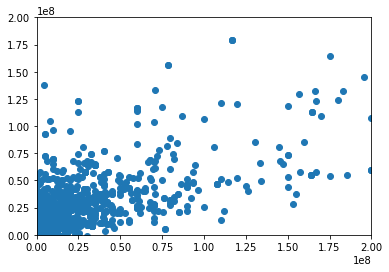

In [278]:
import matplotlib.pyplot as plt
plt.scatter(Y_train,Y_train_pred)
plt.xlim(0,2.0e8)
plt.ylim(0,2.0e8)

In [ ]:
#dataset.info()

In [ ]:
keep_columns = [
                'Permit Number',
       'Block', 'Lot', 'Street Number',
       'Street Number Suffix', 'Street Name', 'Street Suffix', 'Unit',
       'Unit Suffix',
    'Description', #test
    'Current Status', #test
    'Current Status Date', 
       'First Construction Document Date', 'Structural Notification',
       'Number of Existing Stories', 'Number of Proposed Stories',#test
       'Voluntary Soft-Story Retrofit', 'Fire Only Permit',
       'Permit Expiration Date', 'Estimated Cost', 'Revised Cost',
       'Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units',
       'Plansets', 'TIDF Compliance', 'Existing Construction Type',
       'Existing Construction Type Description', 'Proposed Construction Type',
       'Proposed Construction Type Description',
       'Zipcode',
       'Location']

***Let's investigate permit type definition*** 

In [ ]:
mask3 = dataset['Permit Type Definition'] == 'new construction'
ds1 = dataset.loc[mask3,['Description','Number of Existing Stories', 'Number of Proposed Stories','Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units','Revised Cost','Estimated Cost']]

In [ ]:
ds1

In [ ]:
ds1.plot?

In [ ]:
ds1.plot(x='Proposed Units', y= 'Estimated Cost',kind='scatter')

In [ ]:
dataset.loc[mask3,:].nunique()

In [ ]:
dataset['Filed Date'].shape

In [ ]:
new_const=dataset.loc[mask3,:]
new_const.to_csv('new_const.csv')

In [ ]:
mask2 = dataset['Permit Type Definition'] == 'sign - erect'
dataset.loc[mask2,'Description'][0:10]

In [ ]:
mask2 = dataset['Permit Type Definition'] == 'otc alterations permit'
dataset.loc[mask2,'Description'][0:10]

In [ ]:
dataset['Permit Type Definition'].unique()

In [ ]:
dataset['Permit Type Definition'].value_counts()

In [ ]:
dataset['Number of Proposed Stories'].unique()

In [ ]:
dataset['Number of Proposed Stories'].value_counts()

In [ ]:
pd.set_option('display.max_columns',100)
mask1= dataset['Number of Proposed Stories'] == 51.0
display(dataset.loc[mask1,:])

In [ ]:
dataset['Number of Existing Stories'].unique()

In [ ]:
dataset['Number of Existing Stories'].value_counts()

In [ ]:
dataset['Current Status'].value_counts() #we can delete withdrawn and some other permits

In [ ]:
dataset['Description'][:5] #information on where construction takes place

In [ ]:
mask5 = dataset['Permit Type Definition'] == 'new construction wood frame'
dataset.loc[mask5,:].nunique()
